# Practice Optimizing Dataframes and Processing in Chunks

In this project, we'll practice working with chunked dataframes and optimizing a dataframe's memory usage. We'll be working with financial lending data from [Lending Club], a marketplace for personal loans that matches borrowers with investors. You can read more about the marketplace on its [website].

The Lending Club's website lists approved loans. Qualified investors can view the borrower's credit score, the purpose of the loan, and other details in the loan applications. Once a lender is ready to back a loan, it selects the amount of money it wants to fund. When the loan amount the borrower requested is fully funded, the borrower receives the money, minus the [origination fee] that Lending Club charges.

We'll be working with a dataset of loans approved from `2007-2011`, which can be downloaded from [Lending Club's website]. The `desc` column has been removed to improve system performance.

If we read in the entire data set, it will consume about 67 megabytes of memory. For learning purposes, let's imagine that we only have 10 megabytes of memory available throughout this project, so we can practice the concepts we learned in the last two missions.

[Lending Club]: https://www.lendingclub.com/
[website]: https://www.lendingclub.com/public/how-peer-lending-works.action
[origination fee]: https://help.lendingclub.com/hc/en-us/articles/214501207-What-is-the-origination-fee-
[Lending Club's website]: https://www.lendingclub.com/info/download-data.action

In [1]:
import pandas as pd
import pprint as pp
import matplotlib.pyplot as plt
pd.options.display.max_columns = 99

In [2]:
!ls

loans_2007.csv
project02_practice_optimizing_dataframes_and_processing_in_chunks.ipynb


## Introduction

- Read in the first five lines from `loans_2007.csv` and look for any data quality issues.
- Read in the first 1000 rows from the data set, and calculate the total memory usage for these rows. Increase or decrease the number of rows to converge on a memory usage under `five megabytes` (to stay on the conservative side).

In [3]:
first_five = pd.read_csv('loans_2007.csv', nrows=5)
first_five.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


**Observations**:

- `emp_title` has some missing values
- `emp_length` could be cleaned up into a numeric column instead of a string
- Lots of columns can be converted to categories or boolean types

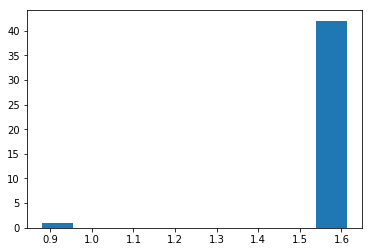

In [4]:
thousand_chunks = pd.read_csv('loans_2007.csv', chunksize=1000)

memory_footprints = []

for chunk in thousand_chunks:
    chunk_memory_mb = chunk.memory_usage(deep=True).sum() / 1048576
    memory_footprints.append(chunk_memory_mb)

plt.hist(memory_footprints)
plt.show()

Chunks of 1000 rows is too small $=>$ Each chunk is no larger than 1.7 MB. Let's increase the chunk size to 3000:

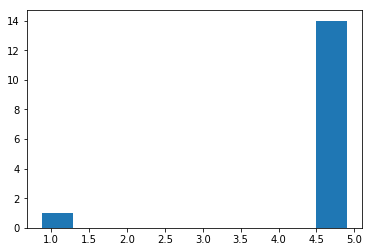

In [5]:
chunks = pd.read_csv('loans_2007.csv', chunksize=3000)

memory_footprints = []

for chunk in chunks:
    chunk_memory_mb = chunk.memory_usage(deep=True).sum() / 1048576
    memory_footprints.append(chunk_memory_mb)

plt.hist(memory_footprints)
plt.show()

Chunks of 3000 rows gets us closer to the 5 MB limit per chunk we set.

---

## Exploring the Data in Chunks

Let's familiarize ourselves with the columns to see which ones we can optimize. Let's try to understand the column types better while using dataframe chunks.

For each chunk:

    - How many columns have a numeric type? How many have a string type?
    - How many unique values are there in each string column? How many of the string columns contain values that are less than 50% unique?
    - Which float columns have no missing values and could be candidates for conversion to the integer type?

Calculate the total memory usage across all of the chunks.

### How many columns have a numeric type? How many have a string type?

In [9]:
chunks = pd.read_csv('loans_2007.csv', chunksize=3000)

count = 0
total_memory_mb = 0
for chunk in chunks:
    count += 1
    
    print(f'\nChunk {count}:')
    print(chunk.dtypes.value_counts())


Chunk 1:
float64    30
object     21
int64       1
dtype: int64

Chunk 2:
float64    30
object     21
int64       1
dtype: int64

Chunk 3:
float64    30
object     21
int64       1
dtype: int64

Chunk 4:
float64    30
object     21
int64       1
dtype: int64

Chunk 5:
float64    30
object     21
int64       1
dtype: int64

Chunk 6:
float64    30
object     21
int64       1
dtype: int64

Chunk 7:
float64    30
object     21
int64       1
dtype: int64

Chunk 8:
float64    30
object     21
int64       1
dtype: int64

Chunk 9:
float64    30
object     21
int64       1
dtype: int64

Chunk 10:
float64    30
object     21
int64       1
dtype: int64

Chunk 11:
float64    30
object     21
int64       1
dtype: int64

Chunk 12:
float64    30
object     21
int64       1
dtype: int64

Chunk 13:
float64    30
object     21
int64       1
dtype: int64

Chunk 14:
float64    30
object     22
dtype: int64

Chunk 15:
float64    30
object     22
dtype: int64


In [11]:
# Are string columns consistent across chunks?
count = 0
obj_cols = []
chunk = pd.read_csv('loans_2007.csv', chunksize=3000)

for chunk in chunk:
    count += 1
    chunk_obj_cols = chunk.select_dtypes(include=['object']).columns.tolist()
    
    if len(obj_cols) > 0:
        is_same = obj_cols == chunk_obj_cols
        
        if not is_same:
            print(f"overall obj cols: {obj_cols}\n")
            print(f"chunk {count} obj cols: {chunk_obj_cols}\n")    
    
    else:
        obj_cols = chunk_obj_cols

overall obj cols: ['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']

chunk 14 obj cols: ['id', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']

overall obj cols: ['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']



**Observations**:

- There are 31 numeric columns and 21 string columns
- In the last 2 chunks, the `id` column is being cast as an object instead of an `int64` type. Since the `id` column isn't useful for analysis, visualization or predictive modeling, we can ignore this column.

### How many unique values are there in each string column? How many of the string columns contain values that are less than 50% unique?

In [36]:
## Create dictionary (key: column, value: list of Series objects representing each chunk's value counts)
# vc - value counts
chunks = pd.read_csv('loans_2007.csv', chunksize=3000)

count = 0
total_num_rows = 0
str_cols_vc = {}

for chunk in chunks:
    total_num_rows += chunk.shape[0]
    str_cols = chunk.select_dtypes(include=['object'])
    
    for col in str_cols.columns:
        current_col_vc = chunk[col].value_counts()
        
        if col in str_cols_vc:
            str_cols_vc[col].append(current_col_vc)
        else:
            str_cols_vc[col] = [current_col_vc]

print(f'Total Num Rows: {total_num_rows}')
## Combine the value count results
combined_vcs = {}

for col, vc_list in str_cols_vc.items():
    combined_vc = pd.concat(vc_list)
    final_vc = combined_vc.groupby(combined_vc.index).sum()
    combined_vcs[col] = final_vc

Total Num Rows: 42538


In [41]:
print(f'Unique Values per string column ({len(combined_vcs)} columns):')
for col, col_vc in combined_vcs.items():
    unique_values_percentage = (len(col_vc) / total_num_rows) * 100
    print(f'{col:<20}: {col_vc.shape[0]:<10}{unique_values_percentage:0.2f}')

Unique Values per string column (22 columns):
term                : 2         0.00
int_rate            : 394       0.93
grade               : 7         0.02
sub_grade           : 35        0.08
emp_title           : 30658     72.07
emp_length          : 11        0.03
home_ownership      : 5         0.01
verification_status : 3         0.01
issue_d             : 55        0.13
loan_status         : 9         0.02
pymnt_plan          : 2         0.00
purpose             : 14        0.03
title               : 21264     49.99
zip_code            : 837       1.97
addr_state          : 50        0.12
earliest_cr_line    : 530       1.25
revol_util          : 1119      2.63
initial_list_status : 1         0.00
last_pymnt_d        : 103       0.24
last_credit_pull_d  : 108       0.25
application_type    : 1         0.00
id                  : 3538      8.32


**Observations**:

- Each string column has varying number of unique values (1 to over 30,000).
- 2 columns in particular (`emp_title` and `title`) contain 50% or more unique values. The remaining string columns have no more than 1 - 10% unique values.

### Which float columns have no missing values and could be candidates for conversion to the integer type?

In [58]:
chunks = pd.read_csv('loans_2007.csv', chunksize=3000)
count = 0
max_count = 2

for chunk in chunks:
    count += 1
    print(f'\nChunk {count}:')
    
    float_cols_with_null_check = chunk.select_dtypes(include=['float']).isnull().sum()
    
    #print(float_cols_with_null_check.shape[0])
    #float_cols_no_missing_val = float_cols_with_null_check.index.tolist()
    
    cols_no_missing_val = list(float_cols_with_null_check[float_cols_with_null_check == 0].index)
    
    cols_with_missing_val = list(float_cols_with_null_check[float_cols_with_null_check > 0].index)
    
    print(f"{len(cols_no_missing_val)}/{len(float_cols_with_null_check)} columns:"\
         f"{cols_no_missing_val}")
    
    print(f"{len(cols_with_missing_val)}/{len(float_cols_with_null_check)} columns:"\
         f"{cols_with_missing_val}")
    
    # the last several chunks have float columns with missing values
    if count > 11:
        print(float_cols_with_null_check)
    #if count >= max_count:
    #    break


Chunk 1:
30/30 columns:['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']
0/30 columns:[]

Chunk 2:
30/30 columns:['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeo

**Observations**:

There are no float columns with no missing values. Therefore, we can't convert any of the float columns to an integer type.

### Calculate the total memory usage across all of the chunks.

In [60]:
chunks = pd.read_csv('loans_2007.csv', chunksize=3000)

count = 0
total_memory_mb = 0
for chunk in chunks:
    count += 1
    print(f"Chunk {count}:", end='\t')
    
    # chunk memory
    chunk_memory_mb = chunk.memory_usage(deep=True).sum() / 1048576
    print(f"Memory Usage: {chunk_memory_mb:0.2f} MB")
    total_memory_mb += chunk_memory_mb

print(f"There are {count} chunks! Total memory: {total_memory_mb:0.2f} MB")

Chunk 1:	Memory Usage: 4.65 MB
Chunk 2:	Memory Usage: 4.64 MB
Chunk 3:	Memory Usage: 4.65 MB
Chunk 4:	Memory Usage: 4.65 MB
Chunk 5:	Memory Usage: 4.64 MB
Chunk 6:	Memory Usage: 4.65 MB
Chunk 7:	Memory Usage: 4.64 MB
Chunk 8:	Memory Usage: 4.65 MB
Chunk 9:	Memory Usage: 4.65 MB
Chunk 10:	Memory Usage: 4.65 MB
Chunk 11:	Memory Usage: 4.66 MB
Chunk 12:	Memory Usage: 4.66 MB
Chunk 13:	Memory Usage: 4.66 MB
Chunk 14:	Memory Usage: 4.90 MB
Chunk 15:	Memory Usage: 0.88 MB
There are 15 chunks! Total memory: 66.22 MB


---

## Optimizing String Columns

We can achieve the greatest memory improvements by converting the string columns to a numeric type. Let's convert all of the columns where the values are less than 50% unique to the category type, and the columns that contain numeric values to the float type.

In [145]:
chunks = pd.read_csv('loans_2007.csv', chunksize=3000)
count = 0
total_initial_memory_mb = 0
total_final_memory_mb = 0
B_PER_MB = 1048576

for chunk in chunks:
    count += 1
    print(f'\nChunk {count}:')
    obj_cols = chunk.select_dtypes(include=['object'])
    
    total_initial_memory_mb += (chunk.memory_usage(deep=True).sum() / 1048576)
    
    #print('Initial Memory Usage:')
    memory_comparison = []
    initial_memory_mb = 0
    for col in obj_cols.columns:
        chunk_memory_mb = chunk[col].memory_usage(deep=True) / 1048576
        initial_memory_mb += chunk_memory_mb
        memory_comparison.append(f'{col:<20}: {chunk_memory_mb:0.2f} ({chunk[col].dtype})')
    
    # convert columns to category type
    chunk['grade'] = chunk['grade'].astype('category')
    chunk['sub_grade'] = chunk['sub_grade'].astype('category')
    chunk['home_ownership'] = chunk['home_ownership'].astype('category')
    chunk['verification_status'] = chunk['verification_status'].astype('category')
    chunk['application_type'] = chunk['application_type'].astype('category')
    chunk['loan_status'] = chunk['loan_status'].astype('category')
    chunk['initial_list_status'] = chunk['initial_list_status'].astype('category')
    chunk['purpose'] = chunk['purpose'].astype('category')
    
    # convert columns to numeric type
    chunk['term'] = chunk['term'].str.replace('months', '').str.replace(' ', '')
    chunk['term'] = pd.to_numeric(chunk['term'], downcast='integer')
    
    chunk['int_rate'] = chunk['int_rate'].str.replace(' ', '').str.replace('%', '')
    chunk['int_rate'] = pd.to_numeric(chunk['int_rate'], downcast='float')
    
    chunk['revol_util'] = chunk['revol_util'].str.replace('%', '')
    chunk['revol_util'] = pd.to_numeric(chunk['revol_util'], downcast='float')
    
    # convert columns to datetime type
    chunk['issue_d'] = pd.to_datetime(chunk['issue_d'])
    chunk['earliest_cr_line'] = pd.to_datetime(chunk['earliest_cr_line'])
    chunk['last_pymnt_d'] = pd.to_datetime(chunk['last_pymnt_d'])
    chunk['last_credit_pull_d'] = pd.to_datetime(chunk['last_credit_pull_d'])
    
    # convert columns to boolean type - 2 valid approaches!
    
    chunk['pymnt_plan'] = chunk['pymnt_plan'].astype('bool')
    
    #d = {'n': False, 'y': True}
    #chunk['pymnt_plan'] = chunk['pymnt_plan'].map(d)
    
    
    # cycle through column unique values
    #for col in obj_cols.columns:
    #    print('\n', col)
    #    unique_values = chunk[col].unique()
    #    print(f'{len(unique_values)} values: {unique_values[:5]}')
    
    #print('\nMemory Comparison:')
    total_memory_mb = 0
    for i, col in enumerate(obj_cols.columns):
        chunk_memory_mb = chunk[col].memory_usage(deep=True) / 1048576
        total_memory_mb += chunk_memory_mb
        previous_info = memory_comparison[i]
        print(f'{previous_info:<10} vs. {chunk_memory_mb:0.2f} ({chunk[col].dtype})')
    
    print(f'Memory: {initial_memory_mb:0.2f} mb vs {total_memory_mb:0.2f} mb')
    
    total_final_memory_mb += (chunk.memory_usage(deep=True).sum() / 1048576)
    break

print(f'\nMemory:{total_initial_memory_mb:0.2f} mb vs {total_final_memory_mb:0.2f} mb')


Chunk 1:
term                : 0.19 (object) vs. 0.00 (int8)
int_rate            : 0.18 (object) vs. 0.01 (float32)
grade               : 0.19 (object) vs. 0.00 (category)
sub_grade           : 0.17 (object) vs. 0.01 (category)
emp_title           : 0.21 (object) vs. 0.21 (object)
emp_length          : 0.18 (object) vs. 0.18 (object)
home_ownership      : 0.18 (object) vs. 0.00 (category)
verification_status : 0.20 (object) vs. 0.00 (category)
issue_d             : 0.19 (object) vs. 0.02 (datetime64[ns])
loan_status         : 0.19 (object) vs. 0.00 (category)
pymnt_plan          : 0.19 (object) vs. 0.00 (bool)
purpose             : 0.20 (object) vs. 0.00 (category)
title               : 0.21 (object) vs. 0.21 (object)
zip_code            : 0.18 (object) vs. 0.18 (object)
addr_state          : 0.17 (object) vs. 0.17 (object)
earliest_cr_line    : 0.19 (object) vs. 0.02 (datetime64[ns])
revol_util          : 0.18 (object) vs. 0.01 (float32)
initial_list_status : 0.19 (object) vs. 0.00 (

In [144]:
(66.22 - 25.85) / 66.22 * 100

60.963455149501655

=> a 61% improvement in memory usage!

---

## Optimizing Numeric Columns

We found out earlier that all float columns have some missing values. So we can't convert any of them to an integer column. We can downcast each float column to a more efficient subtype.

In [158]:
chunks = pd.read_csv('loans_2007.csv', chunksize=3000)
count = 0
total_initial_memory_mb = 0
total_final_memory_mb = 0
B_PER_MB = 1048576

for chunk in chunks:
    count += 1
    print(f'\nChunk {count}:')
    float_cols = chunk.select_dtypes(include=['float'])
    
    total_initial_memory_mb += (chunk.memory_usage(deep=True).sum() / 1048576)
    
    #print('Initial Memory Usage:')
    memory_comparison = []
    initial_memory_mb = 0
    for col in float_cols.columns:
        chunk_memory_mb = chunk[col].memory_usage(deep=True) / 1048576
        initial_memory_mb += chunk_memory_mb
        memory_comparison.append(f'{col:<30}: {chunk_memory_mb:0.2f} ({chunk[col].dtype})')
    
    for col in float_cols.columns:
        chunk[col] = pd.to_numeric(chunk[col], downcast='float')
    
    # cycle through column unique values
    #for col in float_cols.columns:
    #    print('\n', col)
    #    unique_values = chunk[col].unique()
    #    print(f'{len(unique_values)} values: {unique_values[:5]}')
        
    
    #print('\nMemory Comparison:')
    total_memory_mb = 0
    for i, col in enumerate(float_cols.columns):
        chunk_memory_mb = chunk[col].memory_usage(deep=True) / 1048576
        total_memory_mb += chunk_memory_mb
        previous_info = memory_comparison[i]
        #print(f'{previous_info:<20} vs. {chunk_memory_mb:0.2f} ({chunk[col].dtype})')
    
    print(f'Memory: {initial_memory_mb:0.2f} mb vs {total_memory_mb:0.2f} mb')
    
    total_final_memory_mb += (chunk.memory_usage(deep=True).sum() / 1048576)
    
    #break

print(f'\nMemory:{total_initial_memory_mb:0.2f} mb vs {total_final_memory_mb:0.2f} mb')


Chunk 1:
Memory: 0.69 mb vs 0.35 mb

Chunk 2:
Memory: 0.69 mb vs 0.35 mb

Chunk 3:
Memory: 0.69 mb vs 0.35 mb

Chunk 4:
Memory: 0.69 mb vs 0.35 mb

Chunk 5:
Memory: 0.69 mb vs 0.35 mb

Chunk 6:
Memory: 0.69 mb vs 0.35 mb

Chunk 7:
Memory: 0.69 mb vs 0.35 mb

Chunk 8:
Memory: 0.69 mb vs 0.35 mb

Chunk 9:
Memory: 0.69 mb vs 0.35 mb

Chunk 10:
Memory: 0.69 mb vs 0.35 mb

Chunk 11:
Memory: 0.69 mb vs 0.35 mb

Chunk 12:
Memory: 0.69 mb vs 0.35 mb

Chunk 13:
Memory: 0.69 mb vs 0.35 mb

Chunk 14:
Memory: 0.69 mb vs 0.35 mb

Chunk 15:
Memory: 0.13 mb vs 0.06 mb

Memory:66.22 mb vs 61.35 mb


In [160]:
(66.22 - 61.35) / 66.22 * 100

7.354273633343397

=> So we save 7% by converting our float columns to more space efficient subtypes

### Conclusion

By optimizing our strings and float columns, we were able to reduce our memory usage by **68%**. This is quite significant reduction, especially in cases when we are dealing with very large datasets.

---

## Next Steps

Here's an idea for some next steps:

- Create a function that automates as much of the work we just did as possible, so that we could use it on other Lending Club data sets. This function should:
    - Determine the optimal chunk size based on the memory constraints you provide
    - Determine which string columns can be converted to numeric ones by removing the % character
    - Determine which numeric columns can be converted to more space efficient representations